In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv("fraudTest.csv")

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [3]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [4]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
features = ["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"]
x= df[features]

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   amt         555719 non-null  float64
 1   lat         555719 non-null  float64
 2   long        555719 non-null  float64
 3   city_pop    555719 non-null  int64  
 4   unix_time   555719 non-null  int64  
 5   merch_lat   555719 non-null  float64
 6   merch_long  555719 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 29.7 MB


In [8]:
x.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380
std,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071
min,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575
25%,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129
50%,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204
75%,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637
max,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026


In [15]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x.describe()


,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380
std,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071
min,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575
25%,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129
50%,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204
75%,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637
max,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026


In [18]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.005,
    random_state=42,
    n_jobs=-1
)

labels = iso.fit_predict(x_scaled)

np.unique(labels, return_counts=True)

(array([-1,  1]), array([  2779, 552940]))

In [ ]:
print(x_scaled)

[[-0.42446311 -0.90437717  0.677451   ... -1.70387057 -0.89414512
   0.65758597]
 [-0.25233729  0.35118172 -1.47245426 ... -1.70386903  0.17812627
  -1.43661011]
 [-0.17935288  0.42076815  1.21666725 ... -1.70386518  0.38325734
   1.16764009]
 ...
 [ 0.11156401  1.51212126 -2.08940832 ...  1.5103518   1.59258662
  -2.14691241]
 [-0.39173496  1.20170888 -1.91068498 ...  1.51035353  1.1632518
  -1.95510037]
 [-0.19944911 -0.56837864 -0.52824645 ...  1.51035546 -0.45776708
  -0.49551901]]


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

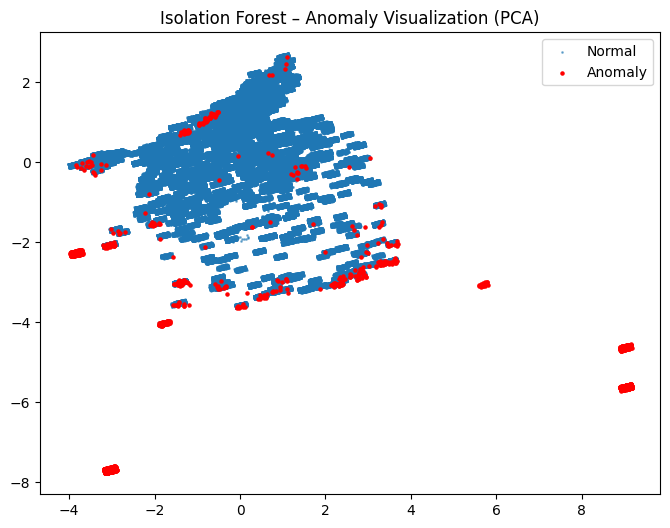

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(
    x_pca[labels == 1, 0],
    x_pca[labels == 1, 1],
    s=1,
    label = "Normal",
    alpha=0.5
)

plt.scatter(
    x_pca[labels == -1, 0],
    x_pca[labels == -1, 1],
    s=5,
    color = "red",
    label = "Anomaly"
)

plt.legend()
plt.title("Isolation Forest – Anomaly Visualization (PCA)")
plt.show()

In [21]:
df_eval = df.copy()
df_eval["anomaly"] = labels

df_eval[df_eval["anomaly"] == -1][
    ["amt", "lat", "long", "merch_lat", "merch_long", "city_pop"]
].head(10)


,amt,lat,long,merch_lat,merch_long,city_pop
269,13.13,29.7972,-95.3288,29.513604,-95.923421,2906700
271,5.58,29.7736,-95.4034,30.157555,-96.142207,2906700
700,82.56,34.0443,-118.2509,34.361182,-118.828684,2383912
703,5.34,29.7736,-95.4034,29.890394,-95.206950,2906700
751,246.33,34.0443,-118.2509,33.519079,-118.100357,2383912
825,10.47,29.7736,-95.4034,29.092009,-94.573770,2906700
856,376.28,33.5623,-112.0559,32.655503,-111.968559,1312922
864,11.45,20.0271,-155.3697,20.733607,-156.139388,1490
872,644.64,33.5623,-112.0559,34.401217,-111.532105,1312922
999,2068.05,44.9673,-93.2828,44.444997,-93.515788,1022298


In [23]:
np.unique(df['is_fraud'], return_counts=True)

(array([0, 1]), array([553574,   2145]))

In [26]:
pd.crosstab(df_eval.anomaly, df.is_fraud)
# x.columns


is_fraud,0,1
anomaly,,
-1,2707,72
1,550867,2073
